In [1]:
!pip install nltk pandas numpy scikit-learn matplotlib seaborn


In [19]:
import nltk
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.util import ngrams


In [16]:
nltk.download('punkt_tab')  # Tokenizer models
nltk.download('stopwords')  # Common stopwords
nltk.download('wordnet')  # Lemmatization dictionary
nltk.download('omw-1.4')  # WordNet dictionary

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Task 1: Data Preprocessing and Exploration**

In [7]:
# Define the file path
file_path = "/content/drive/My Drive/Colab Notebooks/NLP/rotten_tomatoes_movies.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows
df.head()
df.shape

(17712, 22)

In [8]:
# Select relevant columns
df = df[['movie_title', 'movie_info', 'critics_consensus', 'genres']]

# Fill NaN values with empty strings
df = df.fillna('')

# Combine text fields into a single column
df['combined_text'] = df['movie_info'] + ' ' + df['critics_consensus'] + ' ' + df['genres']

# Show first few rows
print(df.head())

                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info  \
0  Always trouble-prone, the life of teenager Per...   
1  Kate (Catherine Keener) and her husband Alex (...   
2  A successful, middle-aged Hollywood songwriter...   
3  Following the closing arguments in a murder tr...   
4  In 1866, Professor Pierre M. Aronnax (Paul Luk...   

                                   critics_consensus  \
0  Though it may seem like just another Harry Pot...   
1  Nicole Holofcener's newest might seem slight i...   
2  Blake Edwards' bawdy comedy may not score a pe...   
3  Sidney Lumet's feature debut is a superbly wri...   
4  One of Disney's finest live-action adventur

In [14]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)

    # Remove special characters and punctuation
    text = re.sub(r"[^\w\s]", "", text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords and apply lemmatization
    processed_text = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join tokens back into string
    return " ".join(processed_text)


In [17]:
df['cleaned_text'] = df['combined_text'].apply(preprocess_text)

# Display first few rows after preprocessing
df[['movie_title', 'cleaned_text']].head()


,movie_title,cleaned_text
0,Percy Jackson & the Olympians: The Lightning T...,always troubleprone life teenager percy jackso...
1,Please Give,kate catherine keener husband alex oliver plat...
2,10,successful middleaged hollywood songwriter fal...
3,12 Angry Men (Twelve Angry Men),following closing argument murder trial 12 mem...
4,"20,000 Leagues Under The Sea",1866 professor pierre aronnax paul lukas assis...


In [18]:
!pip install wordcloud nltk seaborn

In [20]:
# Flatten the list of all words
all_words = [word for tokens in df['cleaned_text'] for word in tokens]

# Get most common unigrams
unigram_counts = Counter(all_words)
common_unigrams = unigram_counts.most_common(20)  # Top 20 words

# Get most common bigrams
bigram_counts = Counter(ngrams(all_words, 2))
common_bigrams = bigram_counts.most_common(20)

# Get most common trigrams
trigram_counts = Counter(ngrams(all_words, 3))
common_trigrams = trigram_counts.most_common(20)

<ipython-input-21-61940c0e65cb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=unigram_df, palette='Blues_r')


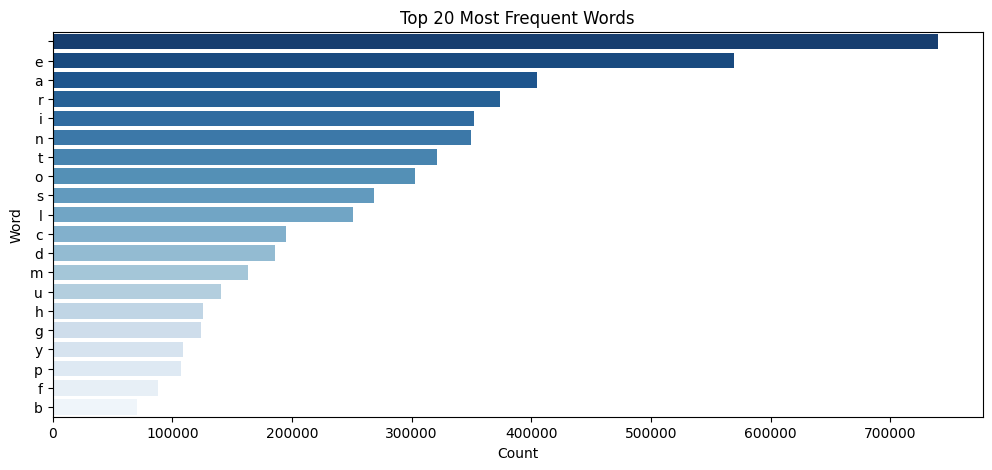

In [21]:
# Bar Plots for Word Frequencies
# Convert to DataFrame
unigram_df = pd.DataFrame(common_unigrams, columns=['Word', 'Count'])

# Plot bar chart
plt.figure(figsize=(12, 5))
sns.barplot(x='Count', y='Word', data=unigram_df, palette='Blues_r')
plt.title('Top 20 Most Frequent Words')
plt.show()


<ipython-input-22-fb54ed6ad2cd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Bigram', data=bigram_df, palette='Greens_r')


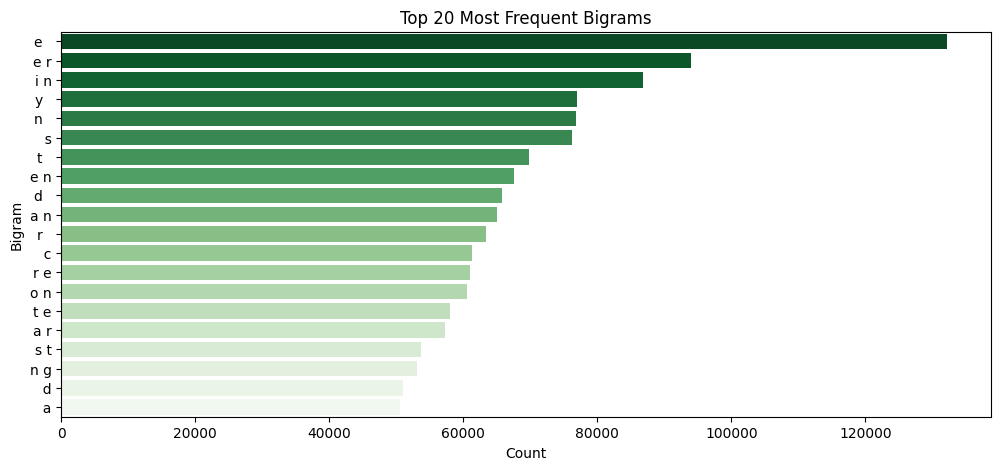

<ipython-input-22-fb54ed6ad2cd>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Trigram', data=trigram_df, palette='Oranges_r')


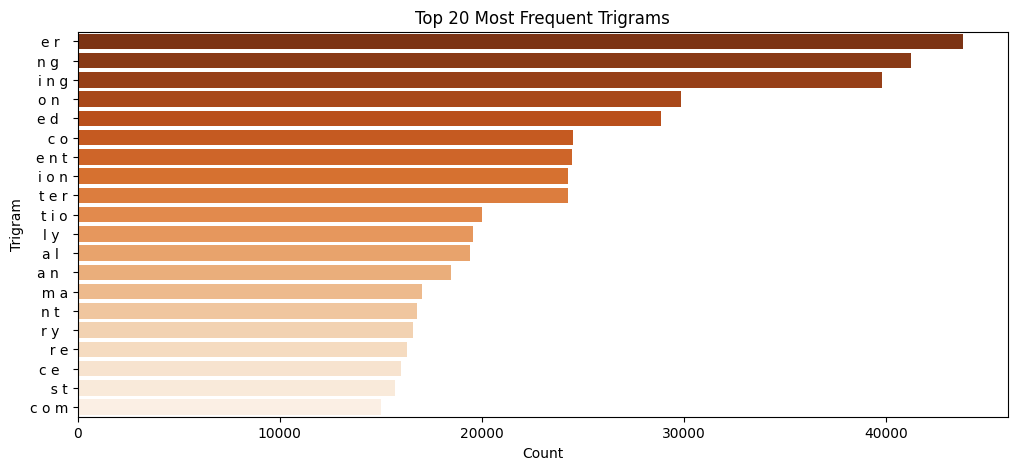

In [22]:
# Convert to DataFrames
bigram_df = pd.DataFrame(common_bigrams, columns=['Bigram', 'Count'])
bigram_df['Bigram'] = bigram_df['Bigram'].apply(lambda x: ' '.join(x))  # Convert tuple to string

trigram_df = pd.DataFrame(common_trigrams, columns=['Trigram', 'Count'])
trigram_df['Trigram'] = trigram_df['Trigram'].apply(lambda x: ' '.join(x))  # Convert tuple to string

# Plot bigrams
plt.figure(figsize=(12, 5))
sns.barplot(x='Count', y='Bigram', data=bigram_df, palette='Greens_r')
plt.title('Top 20 Most Frequent Bigrams')
plt.show()

# Plot trigrams
plt.figure(figsize=(12, 5))
sns.barplot(x='Count', y='Trigram', data=trigram_df, palette='Oranges_r')
plt.title('Top 20 Most Frequent Trigrams')
plt.show()


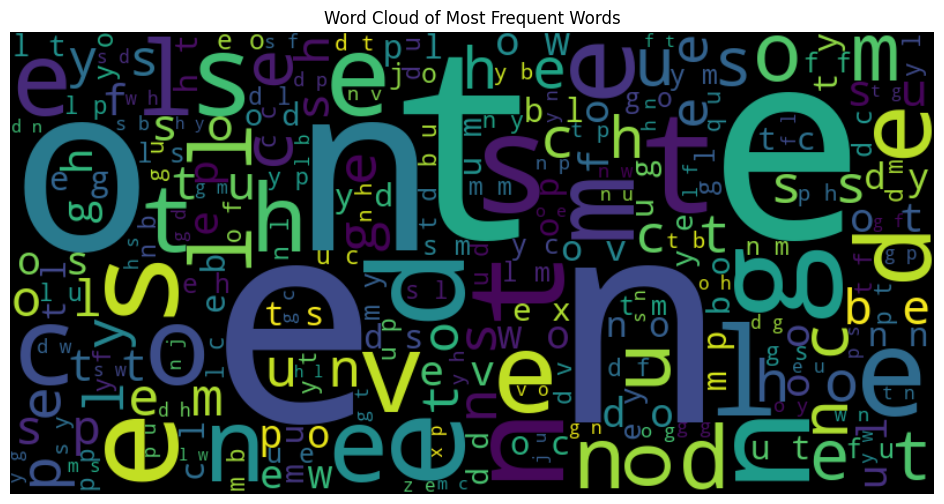

In [23]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(" ".join(all_words))

# Display word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Most Frequent Words")
plt.show()


## **Task 2: TF-IDF Based Similarity**

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

def get_similar_movies(query, top_n=5):
    """Returns the top N most similar movies based on a given query"""
    # Transform the query into TF-IDF vector
    query_vector = tfidf_vectorizer.transform([query])

    # Compute cosine similarity
    similarity_scores = cosine_similarity(query_vector, tfidf_matrix).flatten()

    # Get top N similar movie indices
    top_indices = similarity_scores.argsort()[-top_n:][::-1]

    # Retrieve movie titles and similarity scores
    similar_movies = df.iloc[top_indices][['movie_title']]
    similar_movies['Similarity'] = similarity_scores[top_indices]

    return similar_movies

# Example Usage
query = "A thrilling action-packed adventure with a heroic protagonist"
another_query = "A movie with excellent acting and great storyline"
similar_movies = get_similar_movies(query)
recommendations = get_similar_movies(another_query)
print(similar_movies)


                       movie_title  Similarity
6088   Escape Plan: The Extractors    0.256157
15363                   The Legion    0.233910
2637               American Flyers    0.233910
12497                     Revenger    0.233910
3071                       Babylon    0.233910


## **Task 3: Word Embeddings Based Similarity**

In [30]:
!pip install gensim


In [31]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
def train_word2vec(sentences, vector_size=100, window=5, min_count=2):
    """
    Train both CBOW and Skip-gram Word2Vec models.

    Parameters:
    - sentences: Tokenized text data
    - vector_size: Dimensionality of word vectors
    - window: Max distance between a target word and words around it
    - min_count: Minimum word frequency to be included

    Returns:
    - cbow_model: Trained CBOW Word2Vec model
    - skipgram_model: Trained Skip-gram Word2Vec model
    """
    cbow_model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, sg=0)  # CBOW
    skipgram_model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, sg=1)  # Skip-gram
    return cbow_model, skipgram_model

# Tokenize cleaned text for Word2Vec training
df['tokenized_text'] = df['cleaned_text'].apply(lambda x: x.split())

# Train both models
cbow_model, skipgram_model = train_word2vec(df['tokenized_text'])


In [33]:
def document_embedding(text, model):
    """
    Compute the average word embedding for a document.

    Parameters:
    - text: List of words (tokenized document)
    - model: Trained Word2Vec model

    Returns:
    - avg_vector: Average word vector representation of the document
    """
    vectors = [model.wv[word] for word in text if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Compute document embeddings
df['cbow_embedding'] = df['tokenized_text'].apply(lambda x: document_embedding(x, cbow_model))
df['skipgram_embedding'] = df['tokenized_text'].apply(lambda x: document_embedding(x, skipgram_model))


In [34]:
def find_similar_movies(query, model, df, embedding_col, top_n=5):
    """
    Compute cosine similarity between a query and all documents.

    Parameters:
    - query: User input text
    - model: Word2Vec model (CBOW or Skip-gram)
    - df: Dataframe containing movie data
    - embedding_col: Column storing document embeddings
    - top_n: Number of recommendations to return

    Returns:
    - top_similar_movies: DataFrame with top similar movie titles and similarity scores
    """
    # Preprocess and tokenize the query
    query_tokens = query.lower().split()

    # Compute query embedding
    query_embedding = document_embedding(query_tokens, model)

    # Compute cosine similarity
    df['similarity'] = df[embedding_col].apply(lambda x: cosine_similarity([query_embedding], [x])[0][0])

    # Get top N similar movies
    top_similar_movies = df[['movie_title', 'similarity']].sort_values(by='similarity', ascending=False).head(top_n)

    return top_similar_movies


In [37]:
query = "A thrilling action-packed adventure with a heroic protagonist"
#query = "action-packed thriller with intense fight scenes"

# Get recommendations using CBOW
cbow_recommendations = find_similar_movies(query, cbow_model, df, 'cbow_embedding')

# Get recommendations using Skip-gram
skipgram_recommendations = find_similar_movies(query, skipgram_model, df, 'skipgram_embedding')

# Display results
print("CBOW Recommendations:")
print(cbow_recommendations)

print("\nSkip-gram Recommendations:")
print(skipgram_recommendations)


CBOW Recommendations:
                                          movie_title  similarity
10556                               The Monster Squad    0.915727
14644          The Boy And The Beast (Bakemono No Ko)    0.913325
17014  Wallace & Gromit: The Curse of the Were-Rabbit    0.902809
6088                      Escape Plan: The Extractors    0.901161
10552                      Monster Hunt (Zhuo Yao Ji)    0.896779

Skip-gram Recommendations:
                                  movie_title  similarity
14644  The Boy And The Beast (Bakemono No Ko)    0.952870
15628            The Pirates! Band of Misfits    0.943826
3234             Batman: Mask of the Phantasm    0.939843
14736                              The Colony    0.935899
10772                                    Mute    0.934289
